# Loading the libraries

In [1]:
#Google API

In [2]:
from google.cloud import language_v1
from google.oauth2 import service_account
from google.cloud import language_v1
from google.oauth2 import service_account
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Marek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#Adding path for output model

In [4]:
from pathlib import Path
# Výstupní složka pro obohacený model
output_dir = Path("model_categorizer")
if not output_dir.exists():
    output_dir.mkdir()

In [5]:
#credentials

In [6]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [7]:
#Numpy, pandas and NL

In [8]:
import pandas as pd
import numpy as np
client = language_v1.LanguageServiceClient(credentials=creds)
language = "en"
type_ = language_v1.Document.Type.PLAIN_TEXT
encoding_type = language_v1.EncodingType.UTF8
#importing our data frame
df = pd.read_csv("Hotel_Reviews.csv", 
                 index_col=False, 
                 usecols=['Reviewer_Score', 'Negative_Review', 'Positive_Review'], 
                 dtype={'Reviewer_Score':"float", 'Negative_Review':"string", 'Positive_Review':"string"})


In [9]:
df["Negative_Review"] = df["Negative_Review"].apply(lambda x: x.replace("No Negative", ""))
df["Positive_Review"] = df["Positive_Review"].apply(lambda x: x.replace("No Positive", ""))
df

Negative_Review  \
0        I am so angry that i made this post available...   
1                                                           
2        Rooms are nice but for elderly a bit difficul...   
3        My room was dirty and I was afraid to walk ba...   
4        You When I booked with your company on line y...   
...                                                   ...   
515733   no trolly or staff to help you take the lugga...   
515734           The hotel looks like 3 but surely not 4    
515735   The ac was useless It was a hot week in vienn...   
515736                                                      
515737       I was in 3rd floor It didn t work Free Wife    

                                          Positive_Review  Reviewer_Score  
0        Only the park outside of the hotel was beauti...             2.9  
1        No real complaints the hotel was great great ...             7.5  
2        Location was good and staff were ok It is cut...             7.1  
3        Great location in nice surroundings the bar a...             3.8  
4         Amazing location and building Romantic setting              6.7  
...                                                   ...             ...  
515733                                           location             7.0  
515734      Breakfast was ok and we got earlier check in              5.8  
515735                                                                2.5  
515736   The rooms are enormous and really comfortable...             8.8  
515737                               staff was very kind              8.3  

[515738 rows x 3 columns]

In [10]:
#Seaborn

In [11]:
import seaborn as sns

In [12]:
#Wordcloud

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Data preparation

<AxesSubplot:xlabel='Reviewer_Score', ylabel='Count'>

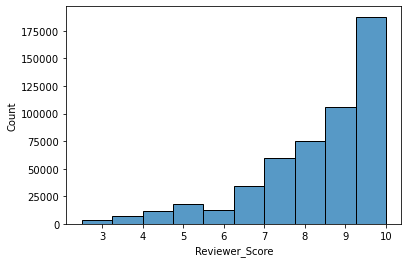

In [14]:
#Showing histogram of score distribution
sns.histplot(x="Reviewer_Score", data=df, palette="RdYlGn", bins=10)

In [15]:
#As good reviews prevail we take as bad bottom 20 and top 20 percent
print("20 percentil", 
      np.percentile(df['Reviewer_Score'],20), 
      "75. percentil",
      np.percentile(df['Reviewer_Score'],75), sep="\n");

20 percentil
7.1
75. percentil
9.6


In [16]:
#shuffle data first
df = df.sample(frac=1)
df

Negative_Review  \
419090   The room was a little small and dark lifts No...   
428345   Two single beds joined together is the only o...   
466359                                                      
439737                                                      
263198                                                      
...                                                   ...   
77967                                    Hot water issues   
378558                                                      
187369                                                      
459395   They charged 50 extra to our account and didn...   
165275   The Wi fi is offered free but it does not wor...   

                                          Positive_Review  Reviewer_Score  
419090   An interesting hotel in the heart of Amsterda...             9.2  
428345   Very clean and nicely decorated hotel The roo...             8.3  
466359   Location great very comfy bed surprisingly qu...            10.0  
439737   Good service excellent delicious food variety...            10.0  
263198              The rooms are much smaller then 16m2              4.6  
...                                                   ...             ...  
77967                     Excellent location and facility             7.9  
378558   The breakfast is not included into the price ...             8.8  
187369   Room and all of the communal areas bright mod...             8.3  
459395                       It was a fantastic location              8.3  
165275                                                                6.3  

[515738 rows x 3 columns]

In [17]:
#removing nothing and hotel from text as these words are not saying anything
df["review"] = df["Negative_Review"] + df["Positive_Review"]
df

Negative_Review  \
419090   The room was a little small and dark lifts No...   
428345   Two single beds joined together is the only o...   
466359                                                      
439737                                                      
263198                                                      
...                                                   ...   
77967                                    Hot water issues   
378558                                                      
187369                                                      
459395   They charged 50 extra to our account and didn...   
165275   The Wi fi is offered free but it does not wor...   

                                          Positive_Review  Reviewer_Score  \
419090   An interesting hotel in the heart of Amsterda...             9.2   
428345   Very clean and nicely decorated hotel The roo...             8.3   
466359   Location great very comfy bed surprisingly qu...            10.0   
439737   Good service excellent delicious food variety...            10.0   
263198              The rooms are much smaller then 16m2              4.6   
...                                                   ...             ...   
77967                     Excellent location and facility             7.9   
378558   The breakfast is not included into the price ...             8.8   
187369   Room and all of the communal areas bright mod...             8.3   
459395                       It was a fantastic location              8.3   
165275                                                                6.3   

                                                   review  
419090   The room was a little small and dark lifts No...  
428345   Two single beds joined together is the only o...  
466359   Location great very comfy bed surprisingly qu...  
439737   Good service excellent delicious food variety...  
263198              The rooms are much smaller then 16m2   
...                                                   ...  
77967    Hot water issues Excellent location and facility  
378558   The breakfast is not included into the price ...  
187369   Room and all of the communal areas bright mod...  
459395   They charged 50 extra to our account and didn...  
165275   The Wi fi is offered free but it does not wor...  

[515738 rows x 4 columns]

In [18]:
from nltk.corpus import wordnet
import string
from nltk.corpus import stopwords
def clean(text):
    # lower text
    text = text.lower()
    return(text)

# clean text data
df["clean"] = df["review"].apply(lambda x: clean(x))
df["clean"] = df["review"].apply(lambda x: x.replace("nothing", ""))
df["clean"] = df["review"].apply(lambda x: x.replace("hotel", ""))

In [19]:
df = df.loc[(df['Reviewer_Score']>= 9.6) | (df['Reviewer_Score']<= 7.1)]

In [20]:
df["isgood"] = df["Reviewer_Score"].apply(lambda x: "POSITIVE" if x >= 9.6 else "NEGATIVE")

<ipython-input-20-411f28431848>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["isgood"] = df["Reviewer_Score"].apply(lambda x: "POSITIVE" if x >= 9.6 else "NEGATIVE")


In [21]:
df

Negative_Review  \
466359                                                      
439737                                                      
263198                                                      
247633                                                      
152298                                                      
...                                                   ...   
458137   The hotel building externally looked dated bu...   
486573                                                nil   
269210                       The swimming pool was small    
430966   The size of the room very small The shower no...   
165275   The Wi fi is offered free but it does not wor...   

                                          Positive_Review  Reviewer_Score  \
466359   Location great very comfy bed surprisingly qu...            10.0   
439737   Good service excellent delicious food variety...            10.0   
263198              The rooms are much smaller then 16m2              4.6   
247633   Wonderful hotel it looks like it has been ver...            10.0   
152298   Excellent location excellent staff Room was a...            10.0   
...                                                   ...             ...   
458137   Magnificent location and views out of the riv...             7.1   
486573                           staff amenities location            10.0   
269210   The shower area was spacious and good air con...            10.0   
430966                                                                7.1   
165275                                                                6.3   

                                                   review  \
466359   Location great very comfy bed surprisingly qu...   
439737   Good service excellent delicious food variety...   
263198              The rooms are much smaller then 16m2    
247633   Wonderful hotel it looks like it has been ver...   
152298   Excellent location excellent staff Room was a...   
...                                                   ...   
458137   The hotel building externally looked dated bu...   
486573                       nil staff amenities location   
269210   The swimming pool was small  The shower area ...   
430966   The size of the room very small The shower no...   
165275   The Wi fi is offered free but it does not wor...   

                                                    clean    isgood  
466359   Location great very comfy bed surprisingly qu...  POSITIVE  
439737   Good service excellent delicious food variety...  POSITIVE  
263198              The rooms are much smaller then 16m2   NEGATIVE  
247633   Wonderful  it looks like it has been very rec...  POSITIVE  
152298   Excellent location excellent staff Room was a...  POSITIVE  
...                                                   ...       ...  
458137   The  building externally looked dated but als...  NEGATIVE  
486573                       nil staff amenities location  POSITIVE  
269210   The swimming pool was small  The shower area ...  POSITIVE  
430966   The size of the room very small The shower no...  NEGATIVE  
165275   The Wi fi is offered free but it does not wor...  NEGATIVE  

[299137 rows x 6 columns]

In [22]:
pos = df.loc[(df['isgood'] == "POSITIVE")]
pos

Negative_Review  \
466359                                                      
439737                                                      
247633                                                      
152298                                                      
408070          Very similar to NYC good central location   
...                                                   ...   
386625                          Nothing would stay again    
216819                                                      
515392   One of the lifts was broken so had to wait ag...   
486573                                                nil   
269210                       The swimming pool was small    

                                          Positive_Review  Reviewer_Score  \
466359   Location great very comfy bed surprisingly qu...            10.0   
439737   Good service excellent delicious food variety...            10.0   
247633   Wonderful hotel it looks like it has been ver...            10.0   
152298   Excellent location excellent staff Room was a...            10.0   
408070                                                                9.6   
...                                                   ...             ...   
386625   How quirky and original the design was the co...            10.0   
216819         Hotel Excellent Service and Food Excellent             9.6   
515392                          The beds are sooooo comfy             9.6   
486573                           staff amenities location            10.0   
269210   The shower area was spacious and good air con...            10.0   

                                                   review  \
466359   Location great very comfy bed surprisingly qu...   
439737   Good service excellent delicious food variety...   
247633   Wonderful hotel it looks like it has been ver...   
152298   Excellent location excellent staff Room was a...   
408070          Very similar to NYC good central location   
...                                                   ...   
386625   Nothing would stay again  How quirky and orig...   
216819         Hotel Excellent Service and Food Excellent   
515392   One of the lifts was broken so had to wait ag...   
486573                       nil staff amenities location   
269210   The swimming pool was small  The shower area ...   

                                                    clean    isgood  
466359   Location great very comfy bed surprisingly qu...  POSITIVE  
439737   Good service excellent delicious food variety...  POSITIVE  
247633   Wonderful  it looks like it has been very rec...  POSITIVE  
152298   Excellent location excellent staff Room was a...  POSITIVE  
408070          Very similar to NYC good central location  POSITIVE  
...                                                   ...       ...  
386625   Nothing would stay again  How quirky and orig...  POSITIVE  
216819         Hotel Excellent Service and Food Excellent  POSITIVE  
515392   One of the lifts was broken so had to wait ag...  POSITIVE  
486573                       nil staff amenities location  POSITIVE  
269210   The swimming pool was small  The shower area ...  POSITIVE  

[187020 rows x 6 columns]

In [23]:
neg = df.loc[(df['isgood'] == "NEGATIVE")]
neg

Negative_Review  \
263198                                                      
142555             interior design is weak old and boring   
172799                                         The rooms    
462521                               Staff Rooms Internet   
39956    For where the hotel is I thought it was a lit...   
...                                                   ...   
107258   The mattress topper had a horrible smell The ...   
168060   it is not a 4 star hotel It is a 3 star depre...   
458137   The hotel building externally looked dated bu...   
430966   The size of the room very small The shower no...   
165275   The Wi fi is offered free but it does not wor...   

                                          Positive_Review  Reviewer_Score  \
263198              The rooms are much smaller then 16m2              4.6   
142555                         location is ok bed is good             7.1   
172799   This is the third time we have stayed at this...             7.1   
462521                                           Location             4.6   
39956      Hotel was lovely and staff were very pleasant              6.7   
...                                                   ...             ...   
107258   The television was amazing and so was the bat...             7.1   
168060                                           nothing              2.5   
458137   Magnificent location and views out of the riv...             7.1   
430966                                                                7.1   
165275                                                                6.3   

                                                   review  \
263198              The rooms are much smaller then 16m2    
142555   interior design is weak old and boring locati...   
172799   The rooms  This is the third time we have sta...   
462521                      Staff Rooms Internet Location   
39956    For where the hotel is I thought it was a lit...   
...                                                   ...   
107258   The mattress topper had a horrible smell The ...   
168060   it is not a 4 star hotel It is a 3 star depre...   
458137   The hotel building externally looked dated bu...   
430966   The size of the room very small The shower no...   
165275   The Wi fi is offered free but it does not wor...   

                                                    clean    isgood  
263198              The rooms are much smaller then 16m2   NEGATIVE  
142555   interior design is weak old and boring locati...  NEGATIVE  
172799   The rooms  This is the third time we have sta...  NEGATIVE  
462521                      Staff Rooms Internet Location  NEGATIVE  
39956    For where the  is I thought it was a little o...  NEGATIVE  
...                                                   ...       ...  
107258   The mattress topper had a horrible smell The ...  NEGATIVE  
168060   it is not a 4 star  It is a 3 star depressing...  NEGATIVE  
458137   The  building externally looked dated but als...  NEGATIVE  
430966   The size of the room very small The shower no...  NEGATIVE  
165275   The Wi fi is offered free but it does not wor...  NEGATIVE  

[112117 rows x 6 columns]

# Entity analysis

In [24]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [25]:
wcpos = WordCloud().generate(' '.join(pos['clean']))
wcneg = WordCloud().generate(' '.join(neg['clean']))

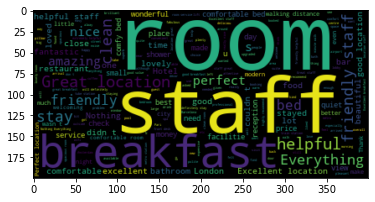

In [26]:
plt.imshow(wcpos, interpolation='bilinear')

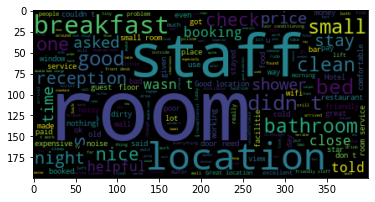

In [27]:
plt.imshow(wcneg, interpolation='bilinear')

In [28]:
pos = pos.sample(frac = 0.03)
neg = neg.sample(frac = 0.02)

In [29]:
def analyze_entity(text):
    language = "en"
    type_ = language_v1.Document.Type.PLAIN_TEXT
    encoding_type = language_v1.EncodingType.UTF8
    document = {"content": text, "type_": type_, "language": language}
    response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})
    return response
cleanpos = ' '.join(pos['clean'])
cleanneg = ' '.join(neg['clean'])
cleanpos

' It rained on the Monday  On arrival for our 4 day stay there was an issue with room availability this was not a problem as they provided a room at their sister  in Kensington for the first night We came back the next day to spend the last 3 days of our London visit here The  staff could not have been more helpful or nice And I would like to thank Pranav one of the managers at the  who looked after us during our stay I highly recommend this  and I look forward to my next visit here A great location excellent breakfast and a unique Theater Bar on the ground floor where the great Lillie Langtry performed Have one of the house cocktails on the stage that Lillie graced with her presence   We were quoted 20 each for breakfast which we declined but after a few days we discovered thre was an a la carte menue So you can breakfast to suite your appetite pocket  The No 4 tram stops right outside the door so the location is great Restaurants in De Pijp are within walking distance  bar is friendl

In [30]:
rpos = analyze_entity(cleanpos)

In [31]:

rneg = analyze_entity(cleanneg)

In [32]:
for entity in rpos.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))

Název entity: ambiance - Typ entity: OTHER - Skóre: 0.25016024708747864
Název entity: Great Hotel Beautiful room - Typ entity: LOCATION - Skóre: 0.23349358141422272
Název entity: vegetarian - Typ entity: PERSON - Skóre: 0.050115104764699936
Název entity: friends - Typ entity: PERSON - Skóre: 0.026656899601221085
Název entity: walk - Typ entity: EVENT - Skóre: 0.02429220825433731
Název entity: Park Grand None The - Typ entity: OTHER - Skóre: 0.015063107945024967
Název entity: Paddington Hotel - Typ entity: LOCATION - Skóre: 0.0057103936560451984
Název entity: staff - Typ entity: PERSON - Skóre: 0.0031937463209033012
Název entity: location - Typ entity: LOCATION - Skóre: 0.0027167208027094603
Název entity: staff - Typ entity: PERSON - Skóre: 0.002681811572983861
Název entity: Me London - Typ entity: LOCATION - Skóre: 0.002476732013747096
Název entity: room - Typ entity: LOCATION - Skóre: 0.0024274378083646297
Název entity: location - Typ entity: LOCATION - Skóre: 0.0021348935551941395
Ná

Název entity: theatre - Typ entity: LOCATION - Skóre: 5.7638128055259585e-05
Název entity: love - Typ entity: OTHER - Skóre: 5.7515902881277725e-05
Název entity: theatres - Typ entity: LOCATION - Skóre: 5.749092815676704e-05
Název entity: travelers - Typ entity: PERSON - Skóre: 5.74075966142118e-05
Název entity: balcony - Typ entity: LOCATION - Skóre: 5.7312194257974625e-05
Název entity: welcome - Typ entity: OTHER - Skóre: 5.722941932617687e-05
Název entity: All - Typ entity: OTHER - Skóre: 5.714689177693799e-05
Název entity: ambiance - Typ entity: OTHER - Skóre: 5.707140371669084e-05
Název entity: travel - Typ entity: OTHER - Skóre: 5.698065797332674e-05
Název entity: cake - Typ entity: OTHER - Skóre: 5.695277650374919e-05
Název entity: birthday card - Typ entity: OTHER - Skóre: 5.695277650374919e-05
Název entity: ambience - Typ entity: OTHER - Skóre: 5.693938146578148e-05
Název entity: takeout menu - Typ entity: OTHER - Skóre: 5.691963087883778e-05
Název entity: size pool - Typ enti

Název entity: three - Typ entity: NUMBER - Skóre: 0.0
Název entity: ten - Typ entity: NUMBER - Skóre: 0.0
Název entity: 15 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 5 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 24 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 2 - Typ entity: NUMBER - Skóre: 0.0
Název entity: TWO - Typ entity: NUMBER - Skóre: 0.0
Název entity: one - Typ entity: NUMBER - Skóre: 0.0
Název entity: 10 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 13 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 2 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 4 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 02 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 500m - Typ entity: NUMBER - Skóre: 0.0
Název entity: 5 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 5 - Typ entity: NUMBER - Skóre: 0.0
Název entity: two - Typ entity: NUMBER - Skóre: 0.0
Název entity: 2 - Typ entity: NUMBER - Skóre: 0.0
Název entity: One - Typ entity: NUMBER - Skóre: 0.0
Název entity: one - Typ enti

In [33]:
for entity in rneg.entities:
    print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
        entity.name,
        language_v1.Entity.Type(entity.type_).name,
        entity.salience))

Název entity: Nice - Typ entity: ORGANIZATION - Skóre: 0.2974242866039276
Název entity: bath tube - Typ entity: OTHER - Skóre: 0.2503993809223175
Název entity: room - Typ entity: LOCATION - Skóre: 0.021445386111736298
Název entity: Crowded Small room - Typ entity: LOCATION - Skóre: 0.008661272935569286
Název entity: Small room Location Room - Typ entity: LOCATION - Skóre: 0.0028617887292057276
Název entity: room - Typ entity: LOCATION - Skóre: 0.00221404735930264
Název entity: Stylish Room - Typ entity: LOCATION - Skóre: 0.002120445715263486
Název entity: The - Typ entity: ORGANIZATION - Skóre: 0.002098306780681014
Název entity: Wouldn t - Typ entity: OTHER - Skóre: 0.002093495335429907
Název entity: Hotel - Typ entity: LOCATION - Skóre: 0.002013087272644043
Název entity: TV - Typ entity: OTHER - Skóre: 0.0018387732561677694
Název entity: rooms - Typ entity: LOCATION - Skóre: 0.001727404654957354
Název entity: Staff - Typ entity: PERSON - Skóre: 0.0016691512428224087
Název entity: part

Název entity: room - Typ entity: LOCATION - Skóre: 0.00030816555954515934
Název entity: room - Typ entity: LOCATION - Skóre: 0.00030816555954515934
Název entity: club room - Typ entity: LOCATION - Skóre: 0.000307085836539045
Název entity: rooms - Typ entity: LOCATION - Skóre: 0.00030657617026008666
Název entity: room - Typ entity: LOCATION - Skóre: 0.0003053285472560674
Název entity: show - Typ entity: EVENT - Skóre: 0.00030490310746245086
Název entity: TV - Typ entity: ORGANIZATION - Skóre: 0.00030483774025924504
Název entity: room - Typ entity: LOCATION - Skóre: 0.0003040829615201801
Název entity: rooms - Typ entity: LOCATION - Skóre: 0.0003037265269085765
Název entity: room - Typ entity: LOCATION - Skóre: 0.00030356040224432945
Název entity: rooms - Typ entity: LOCATION - Skóre: 0.00030340146622620523
Název entity: rooms - Typ entity: LOCATION - Skóre: 0.00030340146622620523
Název entity: t - Typ entity: OTHER - Skóre: 0.00030264200177043676
Název entity: customers - Typ entity: PER

Název entity: need renovation - Typ entity: OTHER - Skóre: 7.271822687471285e-05
Název entity: transport - Typ entity: OTHER - Skóre: 7.268167973961681e-05
Název entity: information - Typ entity: OTHER - Skóre: 7.265233580255881e-05
Název entity: star rating - Typ entity: OTHER - Skóre: 7.26235521142371e-05
Název entity: town - Typ entity: LOCATION - Skóre: 7.26235521142371e-05
Název entity: comfort - Typ entity: OTHER - Skóre: 7.251866190927103e-05
Název entity: coffee machine - Typ entity: CONSUMER_GOOD - Skóre: 7.24069686839357e-05
Název entity: room Baseboards - Typ entity: OTHER - Skóre: 7.238112448249012e-05
Název entity: machine - Typ entity: CONSUMER_GOOD - Skóre: 7.238112448249012e-05
Název entity: website - Typ entity: OTHER - Skóre: 7.23078555893153e-05
Název entity: Metro - Typ entity: LOCATION - Skóre: 7.23074481356889e-05
Název entity: end - Typ entity: OTHER - Skóre: 7.220440602395684e-05
Název entity: transport - Typ entity: OTHER - Skóre: 7.213791832327843e-05
Název en

Název entity: one - Typ entity: NUMBER - Skóre: 0.0
Název entity: 00 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 7 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 3 - Typ entity: NUMBER - Skóre: 0.0
Název entity: one - Typ entity: NUMBER - Skóre: 0.0
Název entity: 4 - Typ entity: NUMBER - Skóre: 0.0
Název entity: one - Typ entity: NUMBER - Skóre: 0.0
Název entity: 16 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 4 - Typ entity: NUMBER - Skóre: 0.0
Název entity: three - Typ entity: NUMBER - Skóre: 0.0
Název entity: 2 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 3 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 2 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 200 - Typ entity: NUMBER - Skóre: 0.0
Název entity: one - Typ entity: NUMBER - Skóre: 0.0
Název entity: 3 - Typ entity: NUMBER - Skóre: 0.0
Název entity: 20 - Typ entity: NUMBER - Skóre: 0.0
Název entity: Two - Typ entity: NUMBER - Skóre: 0.0
Název entity: one - Typ entity: NUMBER - Skóre: 0.0
Název entity: 9 - Typ entity:

# Sentiment classifier

In [34]:
#Kategorie pro trening
df["cats"] = [{"POSITIVE": y== "POSITIVE", "NEGATIVE": y== "NEGATIVE"} for y in df.isgood]

<ipython-input-34-b6782ac7c962>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cats"] = [{"POSITIVE": y== "POSITIVE", "NEGATIVE": y== "NEGATIVE"} for y in df.isgood]


In [35]:
df


Negative_Review  \
466359                                                      
439737                                                      
263198                                                      
247633                                                      
152298                                                      
...                                                   ...   
458137   The hotel building externally looked dated bu...   
486573                                                nil   
269210                       The swimming pool was small    
430966   The size of the room very small The shower no...   
165275   The Wi fi is offered free but it does not wor...   

                                          Positive_Review  Reviewer_Score  \
466359   Location great very comfy bed surprisingly qu...            10.0   
439737   Good service excellent delicious food variety...            10.0   
263198              The rooms are much smaller then 16m2              4.6   
247633   Wonderful hotel it looks like it has been ver...            10.0   
152298   Excellent location excellent staff Room was a...            10.0   
...                                                   ...             ...   
458137   Magnificent location and views out of the riv...             7.1   
486573                           staff amenities location            10.0   
269210   The shower area was spacious and good air con...            10.0   
430966                                                                7.1   
165275                                                                6.3   

                                                   review  \
466359   Location great very comfy bed surprisingly qu...   
439737   Good service excellent delicious food variety...   
263198              The rooms are much smaller then 16m2    
247633   Wonderful hotel it looks like it has been ver...   
152298   Excellent location excellent staff Room was a...   
...                                                   ...   
458137   The hotel building externally looked dated bu...   
486573                       nil staff amenities location   
269210   The swimming pool was small  The shower area ...   
430966   The size of the room very small The shower no...   
165275   The Wi fi is offered free but it does not wor...   

                                                    clean    isgood  \
466359   Location great very comfy bed surprisingly qu...  POSITIVE   
439737   Good service excellent delicious food variety...  POSITIVE   
263198              The rooms are much smaller then 16m2   NEGATIVE   
247633   Wonderful  it looks like it has been very rec...  POSITIVE   
152298   Excellent location excellent staff Room was a...  POSITIVE   
...                                                   ...       ...   
458137   The  building externally looked dated but als...  NEGATIVE   
486573                       nil staff amenities location  POSITIVE   
269210   The swimming pool was small  The shower area ...  POSITIVE   
430966   The size of the room very small The shower no...  NEGATIVE   
165275   The Wi fi is offered free but it does not wor...  NEGATIVE   

                                         cats  
466359  {'POSITIVE': True, 'NEGATIVE': False}  
439737  {'POSITIVE': True, 'NEGATIVE': False}  
263198  {'POSITIVE': False, 'NEGATIVE': True}  
247633  {'POSITIVE': True, 'NEGATIVE': False}  
152298  {'POSITIVE': True, 'NEGATIVE': False}  
...                                       ...  
458137  {'POSITIVE': False, 'NEGATIVE': True}  
486573  {'POSITIVE': True, 'NEGATIVE': False}  
269210  {'POSITIVE': True, 'NEGATIVE': False}  
430966  {'POSITIVE': False, 'NEGATIVE': True}  
165275  {'POSITIVE': False, 'NEGATIVE': True}  

[299137 rows x 7 columns]

In [36]:
#split ratio
split = 0.8
split_row = int(len(df) * split)

In [37]:
#test and train data
df_test = df[split_row:]
df_train = df[:split_row]

In [38]:
#convert to list
train_data = list(zip(df_train["clean"], [{"cats": cats} for cats in df_train["cats"]]))
test_data = list(zip(df_test["clean"], [{"cats": cats} for cats in df_test["cats"]]))

In [39]:
import spacy
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [40]:
nlp = spacy.load("en_core_web_sm")

In [41]:
textcat = nlp.create_pipe("textcat",
                          config={"exclusive_classes": True,
                                  "architecture": "simple_cnn"})

In [42]:
nlp.add_pipe(textcat, last=True)

In [43]:
#labels
textcat.add_label("POSITIVE")
textcat.add_label("NEGATIVE")

1

In [44]:
#split into batches
from spacy.util import minibatch, compounding

In [45]:
batch_sizes = compounding(1.0, 4.0, 1.5)
for batch in minibatch(train_data[1:5], size=batch_sizes):
    print("\nbatch:", len(batch), batch)


batch: 1 [(' Good service excellent delicious food variety every day', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]

batch: 1 [(' The rooms are much smaller then 16m2 ', {'cats': {'POSITIVE': False, 'NEGATIVE': True}})]

batch: 2 [(' Wonderful  it looks like it has been very recently refurbished gorgeous carpets everywhere and the room was amazing booking in and out was a breeze also our room was ready when we got there at 1pm so gave us a chance to change before going out to lunch All the staff were very helpful will definitely be going back again ', {'cats': {'POSITIVE': True, 'NEGATIVE': False}}), (' Excellent location excellent staff Room was a bit small by North American standards however by Paris standards it was good We would stay at this  again ', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]


In [46]:
#number of iterations
n_iter = 50

In [47]:
#high dropout rate to prevent overfiting
dropout = 0.7

In [48]:
pipe_exceptions = ["textcat"] #, "trf_wordpiecer", "trf_tok2vec"
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [49]:
from sklearn import metrics # funkce pro skóring

In [50]:
y = df_test["isgood"] # ["POSITIVE", "NEGATIVE", "POSITIVE", "NEGATIVE", ...]
random_scores = np.random.rand(len(df_test.isgood)) # náhodné skóre od 0 (NEGATIVE) do 1 (POSITIVE)

fpr, tpr, thresholds = metrics.roc_curve(y, random_scores, pos_label="POSITIVE") # kalkulace ROC

In [51]:
fpr[:20]

array([0.00000000e+00, 4.44859647e-05, 4.44859647e-05, 8.89719294e-05,
       8.89719294e-05, 1.77943859e-04, 1.77943859e-04, 2.22429823e-04,
       2.22429823e-04, 2.66915788e-04, 2.66915788e-04, 3.11401753e-04,
       3.11401753e-04, 3.55887717e-04, 3.55887717e-04, 4.00373682e-04,
       4.00373682e-04, 4.44859647e-04, 4.44859647e-04, 5.33831576e-04])

In [52]:
tpr[:20]

array([0.00000000e+00, 0.00000000e+00, 2.67744786e-05, 2.67744786e-05,
       5.35489571e-05, 5.35489571e-05, 8.03234357e-05, 8.03234357e-05,
       1.33872393e-04, 1.33872393e-04, 2.40970307e-04, 2.40970307e-04,
       3.21293743e-04, 3.21293743e-04, 4.55166136e-04, 4.55166136e-04,
       5.89038528e-04, 5.89038528e-04, 6.42587486e-04, 6.42587486e-04])

In [63]:
metrics.auc(fpr, tpr)

0.9632246700548157

[Text(0.5, 0, 'False Positive'), Text(0, 0.5, 'True Positive')]

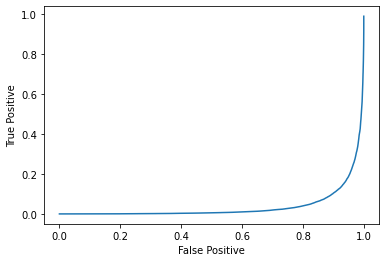

In [60]:
plot = sns.lineplot(x = tpr, y = fpr, ci = None)
plot.set(xlabel='False Positive', ylabel='True Positive')

In [54]:
import random # pro zamíchání příklady


In [55]:
#prilis mnoho dat 
#alternativní skórování pomocí ROC a balíčku sklearn
#docs_generator = nlp.pipe(df_test["clean"]) # dávkové zpracování testovacích dokumentů
#docs = list(docs_generator) # načtení testovacích dokumentů do listu
#scores = [doc.cats["POSITIVE"] for doc in docs] # načtení sentimentu do listu

In [56]:
# kalkulace ROC
#fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["isgood"], 
                                         #y_score = scores, 
                                         #pos_label = "POSITIVE")

In [57]:
# zobrazení ROC grafu
#roc_plot = sns.lineplot(x=fpr, y=tpr, linewidth=2.5, ci = None)
#roc_plot.set(xlabel='False Positive', ylabel='True Positive')
#plt.show() # zobrazení křivky za běhu buňky

In [58]:
examples = pd.DataFrame(["The rooms were clean.", "They went over and beyond to help make our stay enjoyable.",
                         "The breakfast is one of the best I have ever had in Europe.",
                         "I highly recommend this hotel for anyone visiting downtown", 
                         "We got to hotel super early", "The sevice was exceptional as well.",
                         "Every staff member I encountered were delightful and eager to help!",
                         "The bed was extremely comfortable.", "The room was spacious and clean.",
                         "Beautiful atmosphere inside and outside around that part of the city.",
                         "Everything what you need is possible.", "The room was huge, modern, and spotless.",
                         "This is a beautiful hotel!", "The environment was pleasant and welcoming.",
                         "We could park our motorcycles in the closed garage.", "Great value for money.",
                         "Must definitelly recommend breakfast, good food and variety of it.",
                         "Hot water constantly running out.", "Virtually no cooking utensils",
                         "Beds were extremely uncomfortable", "Pillows were solid hurting your neck when you slept.",
                         "My kid broke his arm there.", "Worst hotel I've stayed in.", "No Wi-Fi inside rooms.",
                         "Fridge was dirty and horrible and the bottom of it was rusty.", "Back-pain guaranteed.",
                         "Only way to let some fresh air inside is to open the main door.", 
                         "Limited hot water in apartments", "Barely slept all week.", 
                         "Staff are extremely rude and unhelpful", "Majority of hotel staff were miserable",
                         "Rooms smelt of cheap air freshener in an attempt to cover up a bad smell.",
                         "Furniture was cheap and didn't match (not a big deal)", "Smells very very ugly from bathroom.",
                         "standards were below what we were expecting."
                        ], 
                        columns=["clean"])
examples

clean
0                               The rooms were clean.
1   They went over and beyond to help make our sta...
2   The breakfast is one of the best I have ever h...
3   I highly recommend this hotel for anyone visit...
4                         We got to hotel super early
5                 The sevice was exceptional as well.
6   Every staff member I encountered were delightf...
7                  The bed was extremely comfortable.
8                    The room was spacious and clean.
9   Beautiful atmosphere inside and outside around...
10              Everything what you need is possible.
11           The room was huge, modern, and spotless.
12                         This is a beautiful hotel!
13        The environment was pleasant and welcoming.
14  We could park our motorcycles in the closed ga...
15                             Great value for money.
16  Must definitelly recommend breakfast, good foo...
17                  Hot water constantly running out.
18                      Virtually no cooking utensils
19                  Beds were extremely uncomfortable
20  Pillows were solid hurting your neck when you ...
21                        My kid broke his arm there.
22                        Worst hotel I've stayed in.
23                             No Wi-Fi inside rooms.
24  Fridge was dirty and horrible and the bottom o...
25                              Back-pain guaranteed.
26  Only way to let some fresh air inside is to op...
27                    Limited hot water in apartments
28                             Barely slept all week.
29             Staff are extremely rude and unhelpful
30             Majority of hotel staff were miserable
31  Rooms smelt of cheap air freshener in an attem...
32  Furniture was cheap and didn't match (not a bi...
33               Smells very very ugly from bathroom.
34       standards were below what we were expecting.

In [ ]:
score = pd.DataFrame() # dataframe pro výsledky
print("trénink", end="") # začátek tisku průběhu na řádek

with nlp.disable_pipes(other_pipes):  # s dočasně vypnutými ostatními pipes
    
    optimizer = nlp.begin_training() # vytvoření optimalizátoru    
    
    for i in range(n_iter): # iterace přes celou tréninkovou množinu (epocha)
        print(".", end="") # tisk průběhu další iterace na řádek
        losses = {} # příprava pro ukládání informací o ztrátách        
        random.shuffle(train_data) # zamíchání tréninkovou množinou
        
        batch_sizes = compounding(8.0, 40.0, 1.2) # inicializace počtu příkladů ve várkách
        batches = minibatch(train_data, size=batch_sizes) # načtení příkladů ve várkách
        
        for batch in batches: # učení se na každé várce 
            texts, annotations = zip(*batch) # uložení polí dvojic do dvou separátních polí
            
            nlp.update(texts, annotations, sgd=optimizer, drop=dropout, losses=losses) # samotné učení
        
        with textcat.model.use_params(optimizer.averages): # s dočasnou aplikací aktualizovaného modelu
            scorer = nlp.evaluate(test_data) # evaluace modelu na testovacích datech
            
            # vyplnění tabulky se skórem modelu v iteraci
            score.loc[i, "loss"] = losses["textcat"] # zapsání končené ztráty do tabulky
            score.loc[i,"F"] = scorer.textcat_score            
            score.loc[i,"P+"] = scorer.textcats_per_cat["POSITIVE"]["p"]
            score.loc[i,"R+"] = scorer.textcats_per_cat["POSITIVE"]["r"]
            score.loc[i,"F+"] = scorer.textcats_per_cat["POSITIVE"]["f"]
            score.loc[i,"P-"] = scorer.textcats_per_cat["NEGATIVE"]["p"]
            score.loc[i,"R-"] = scorer.textcats_per_cat["NEGATIVE"]["r"]
            score.loc[i,"F-"] = scorer.textcats_per_cat["NEGATIVE"]["f"]
            
        
            
score #zobrazení tabulky se skóre po celém učení

trénink.

In [64]:

def evaluate(row, nlp=nlp):
    row["sentiment_score"]=nlp(row["text"]).cats["POSITIVE"]    
    return row


In [65]:
examples = examples.apply(evaluate, nlp=nlp, axis=1)

KeyError: 'text'

In [ ]:
examples["sentiment"] = pd.cut(examples["sentiment_score"], 
                   bins=[0,0.4,1], 
                   labels=["NEGATIVE","POSITIVE"])

In [ ]:
examples

In [ ]:
#business analyza

In [ ]:
import numpy as np
random_hotels = np.random.choice(["Modrá Hvězda", "Hotel Praha", "Hotel Moskva"], 
                                 size=len(examples.index))

examples.loc[:,"hotel"] = pd.Series(random_hotels, dtype="category")
examples

In [ ]:
sns.countplot(x="hotel", hue="sentiment", data=examples, palette="inferno")